In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
#from sklearn.neural_network import MLPClassifier as nn
from sklearn import tree
import pandas as pd
from sklearn import svm

In [2]:
train = np.genfromtxt('train.csv',delimiter = ",",skip_header=1,dtype = "int32")
test = np.genfromtxt('test.csv',delimiter = ",",skip_header=1,dtype = "int32")

In [3]:
# split the data into labels and image data
trainLabels = train[:,0]
trainData = train[:,1:]

In [4]:
print trainData.shape

(42000, 784)


In [48]:
# get the first ten digits of the images
digits = map(lambda x: x.reshape(28,28), trainData[0:100,:])
#fig, ax = plt.subplots()
#ax.imshow(digits[0],cmap = 'Greys_r', interpolation='nearest')

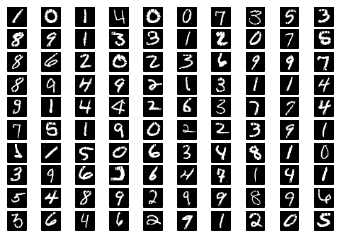

In [49]:
fig = plt.figure()
for i in range(10):
    for j in range(10):
        ax = plt.subplot2grid((10,10), (i,j))
        plt.setp(ax.get_xticklabels(), visible=False)
        plt.setp(ax.get_yticklabels(), visible=False)
        ax.imshow(digits[i*10+j], cmap='Greys_r')
plt.show()

In [56]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(trainData, trainLabels)
newLabels = clf.predict(trainData)


In [57]:
print pd.crosstab(trainLabels, newLabels)

col_0     0     1     2     3     4     5     6     7     8     9
row_0                                                            
0      4132     0     0     0     0     0     0     0     0     0
1         0  4684     0     0     0     0     0     0     0     0
2         0     0  4177     0     0     0     0     0     0     0
3         0     0     0  4351     0     0     0     0     0     0
4         0     0     0     0  4072     0     0     0     0     0
5         0     0     0     0     0  3795     0     0     0     0
6         0     0     0     0     0     0  4137     0     0     0
7         0     0     0     0     0     0     0  4401     0     0
8         0     0     0     0     0     0     0     0  4063     0
9         0     0     0     0     0     0     0     0     0  4188


In [58]:
testLabels = clf.predict(test)

In [60]:
print testLabels

[2 0 9 ..., 3 9 2]
28000


In [61]:
# save results
np.savetxt('submission_decision_tree.csv', np.c_[range(1,len(test)+1),testLabels], delimiter=',', header = 'ImageId,Label', comments = '', fmt='%d')

In [ ]:
svm_model = svm.SVC(decision_function_shape='ovo')
svm_model = svm_model.fit(trainData, trainLabels)
svm_labels = svm_model.predict(trainData)

In [ ]:
print pd.crosstab(trainLabels, svm_labels)